<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.376939,96.872082,79.653035,89.863258,0.008896,315.774211,315.760856,0.013355
1,0.0,1.0,43.682010,48.059941,61.460339,59.320835,-0.009060,222.514064,222.533172,-0.019108
2,0.0,2.0,88.778130,34.562947,52.792236,35.785294,0.034512,221.953119,221.927772,0.025347
3,0.0,3.0,44.667711,97.006247,91.378809,95.322647,-0.027493,338.347920,338.368724,-0.020804
4,0.0,4.0,53.926301,30.875153,55.465876,23.089655,-0.076146,173.280840,173.371224,-0.090385
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.529179,76.678950,44.801739,55.910227,0.018584,259.938679,259.924380,0.014298
119996,999.0,116.0,83.804318,87.266832,63.637361,81.644099,-0.037305,326.315306,326.361317,-0.046011
119997,999.0,117.0,30.392502,77.147831,89.590768,50.484778,0.008325,257.624204,257.595228,0.028975
119998,999.0,118.0,20.704540,72.663164,77.155135,99.226779,-0.015972,279.733645,279.740181,-0.006536


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.376939  96.872082  79.653035  89.863258  0.008896  315.774211   
      1.0    43.682010  48.059941  61.460339  59.320835 -0.009060  222.514064   
      2.0    88.778130  34.562947  52.792236  35.785294  0.034512  221.953119   
      3.0    44.667711  97.006247  91.378809  95.322647 -0.027493  338.347920   
      4.0    53.926301  30.875153  55.465876  23.089655 -0.076146  173.280840   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.529179  76.678950  44.801739  55.910227  0.018584  259.938679   
      116.0  83.804318  87.266832  63.637361  81.644099 -0.037305  326.315306   
      117.0  30.392502  77.147831  89.590768  50.484778  0.008325  257.624204   
      118.0  20.704540  72.663164  77.155135  99.226779 -0.015972  279.733645   
      119.0  58.626658  53.417164  58.144761  47.355903  0.021366  227.565853   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    315.760856  0.013355  
      1.0    222.533172 -0.019108  
      2.0    221.927772  0.025347  
      3.0    338.368724 -0.020804  
      4.0    173.371224 -0.090385  
...                 ...       ...  
999.0 115.0  259.924380  0.014298  
      116.0  326.361317 -0.046011  
      117.0  257.595228  0.028975  
      118.0  279.740181 -0.006536  
      119.0  227.543412  0.022441  

[120000 rows x 8 columns]

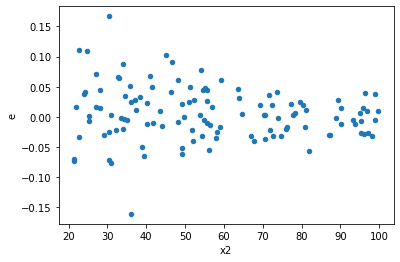

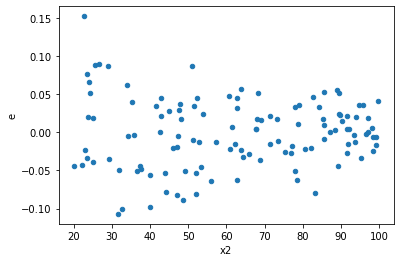

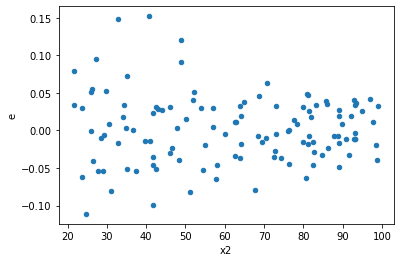

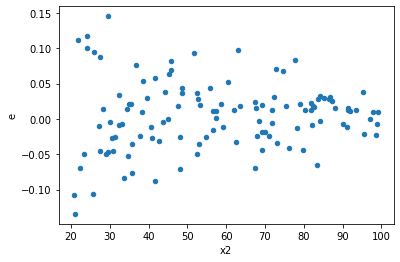

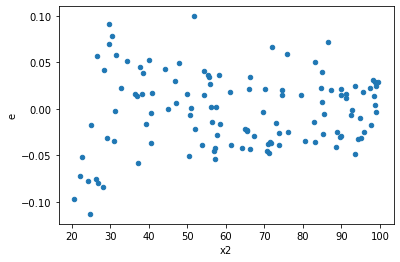

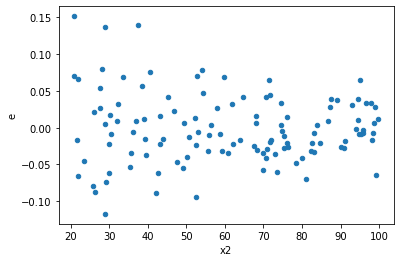

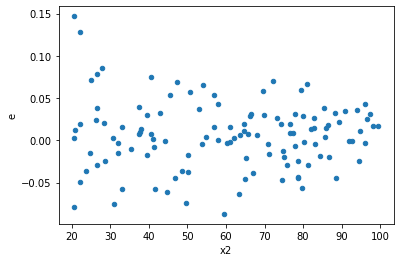

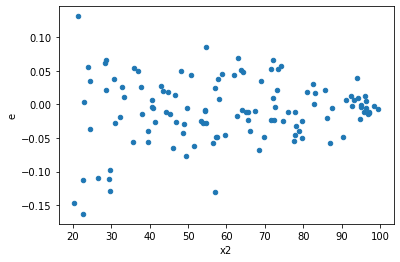

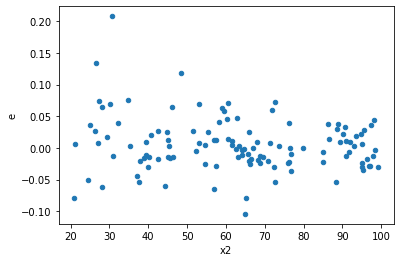

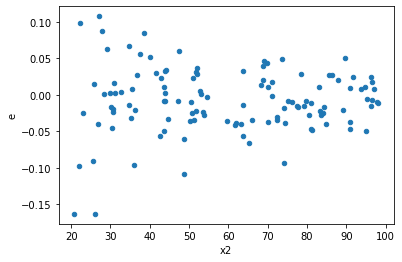

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,57.0,55.0,0.05306938578410026,0.12272987937162637,0.0009310418558614081,0.0022314523522113886,2.396726138747897,0.0013911135824333787,0.9993044432087833,0.0006955567912166893,Reject001=0 : Heteroscedasticity
6.0,61.0,51.0,0.0615137117106868,0.11741375561269941,0.001008421503453882,0.0023022305022097926,2.2830041746676026,0.0029015155941289894,0.9985492422029355,0.0014507577970644947,Reject001=0 : Heteroscedasticity
7.0,39.0,73.0,0.05722147642117916,0.19588801767409778,0.001467217344132799,0.002683397502384901,1.828902522939386,0.02628965789185078,0.9868551710540746,0.01314482894592539,Reject001=1 : Homoscedasticity
8.0,58.0,54.0,0.08613578515171239,0.11914108752058475,0.001485099743995041,0.0022063164355663844,1.4856351867863171,0.14368175719512588,0.9281591214024371,0.07184087859756294,Reject001=1 : Homoscedasticity
9.0,60.0,52.0,0.10327872060864657,0.1175504960779045,0.0017213120101441095,0.0022605864630366253,1.3132926800687152,0.3166311017829493,0.8416844491085254,0.15831555089147464,Reject001=1 : Homoscedasticity
13.0,49.0,63.0,0.041005924198972046,0.1744565131226562,0.0008368555958973887,0.0027691510019469236,3.308995023182547,1.009559669529203e-05,0.9999949522016524,5.047798347646015e-06,Reject001=0 : Heteroscedasticity
18.0,49.0,63.0,0.08216918848353238,0.12721986313991063,0.0016769222139496405,0.0020193629069827084,1.2042078578150146,0.4838260513942534,0.7580869743028733,0.2419130256971267,Reject001=1 : Homoscedasticity
21.0,45.0,67.0,0.074130926680977,0.14188815523607642,0.0016473539262439332,0.0021177336602399466,1.2855365362005162,0.34638256633410336,0.8268087168329483,0.17319128316705168,Reject001=1 : Homoscedasticity
22.0,58.0,54.0,0.050868074202938006,0.1314628532777128,0.0008770357621196207,0.0024344972829206074,2.7758244168252757,0.00021677656843333004,0.9998916117157833,0.00010838828421666502,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,52.0,0.12032783111935785,0.09544260632418591,0.0020054638519892976,0.0018354347370035753,0.9152170632160417,0.7369798164782985,Reject001=1 : Homoscedasticity
1.0,54.0,58.0,0.15549688536435488,0.05574390253059673,0.002879571951191757,0.0009611017677689091,0.3337654985044363,7.433680275454537e-05,Reject001=0 : Heteroscedasticity
2.0,54.0,58.0,0.13903477659667354,0.08030441743034207,0.002574718085123584,0.0013845589212127943,0.5377516587981463,0.022613359553734565,Reject001=1 : Homoscedasticity
3.0,53.0,59.0,0.15036706847202505,0.10597684285708134,0.0028371144994721706,0.0017962176755437515,0.6331142701071556,0.09268248464182878,Reject001=1 : Homoscedasticity
4.0,57.0,55.0,0.05306938578410026,0.12272987937162637,0.0009310418558614081,0.0022314523522113886,2.396726138747897,0.0013911135824333787,Reject001=0 : Heteroscedasticity
5.0,57.0,55.0,0.18866549316771536,0.058836177762113785,0.0033099209327669362,0.001069748686583887,0.3231946346493625,3.8342125625889973e-05,Reject001=0 : Heteroscedasticity
6.0,61.0,51.0,0.0615137117106868,0.11741375561269941,0.001008421503453882,0.0023022305022097926,2.2830041746676026,0.0029015155941289894,Reject001=0 : Heteroscedasticity
7.0,39.0,73.0,0.05722147642117916,0.19588801767409778,0.001467217344132799,0.002683397502384901,1.828902522939386,0.02628965789185078,Reject001=1 : Homoscedasticity
8.0,58.0,54.0,0.08613578515171239,0.11914108752058475,0.001485099743995041,0.0022063164355663844,1.4856351867863171,0.14368175719512588,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      661
Reject001=0 : Heteroscedasticity    339
Name: Result_test, dtype: int64